<a href="https://colab.research.google.com/github/Samue1A/TrashDetection/blob/main/sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original


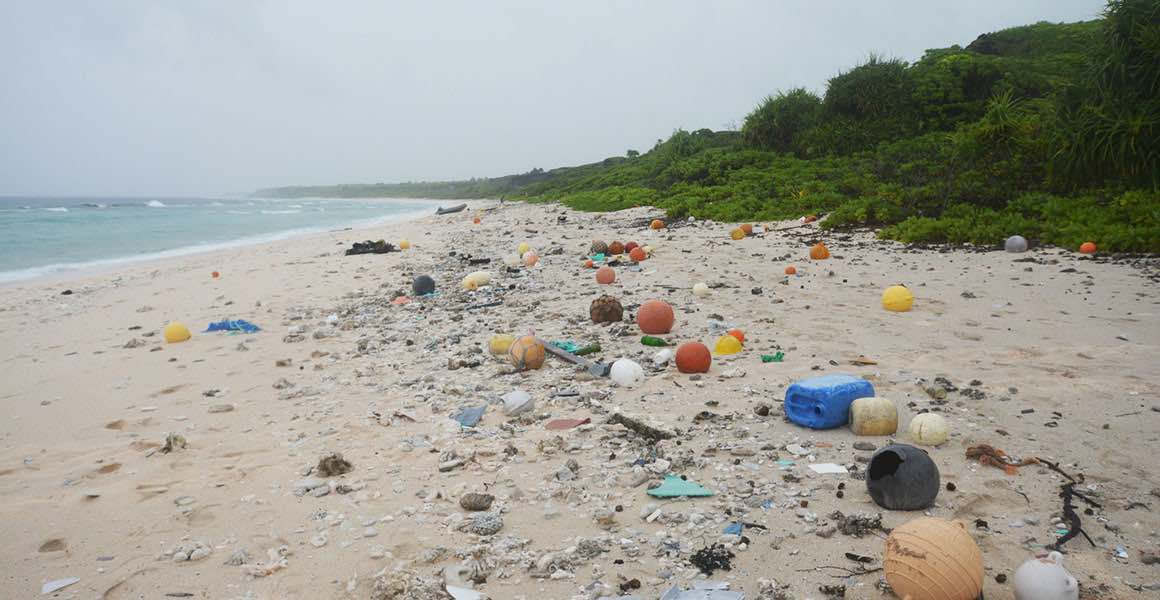

Canny Edge Detection


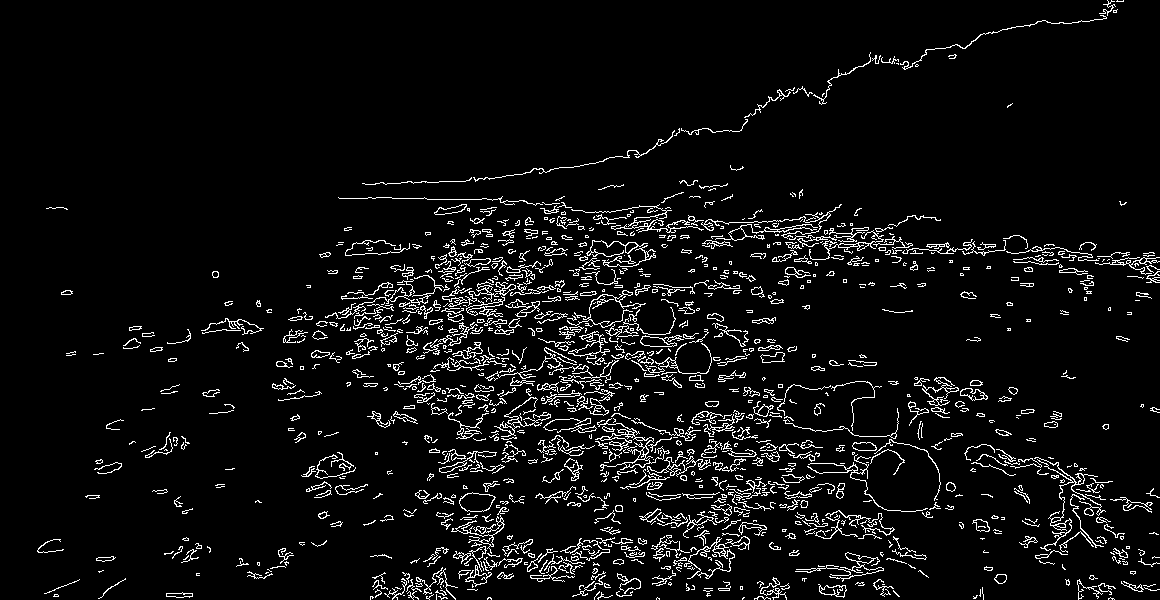

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import os
os.getcwd()

from google.colab import drive

drive.mount("/content/drive")

# Read the original image
pp = "/content/drive/MyDrive/Colab Notebooks/sobelNshii/plastic.jpg"
assert os.path.exists(pp)
img = cv2.imread(pp)
# Display original image
print('Original')
cv2_imshow(img)
cv2.waitKey(0)

# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
# print('Sobel X')
# cv2_imshow(sobelx)
# cv2.waitKey(0)
# print('Sobel Y')
# cv2_imshow(sobely)
# cv2.waitKey(0)
# print('Sobel X Y using Sobel() function')
# cv2_imshow(sobelxy)
# cv2.waitKey(0)




# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
print('Canny Edge Detection')
cv2_imshow(edges)
cv2.waitKey(0)



#===========================================================================
# img_gray = cv2.cvtColor(sobelxy, cv2.COLOR_BGR2GRAY)
# # Blur the image for better edge detection
# img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
# sobelxyxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
# edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# # Display Canny Edge Detection Image
# print('Canny Edge Detection')
# cv2_imshow(edges)
# cv2.waitKey(0)
#===========================================================================

cv2.destroyAllWindows()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


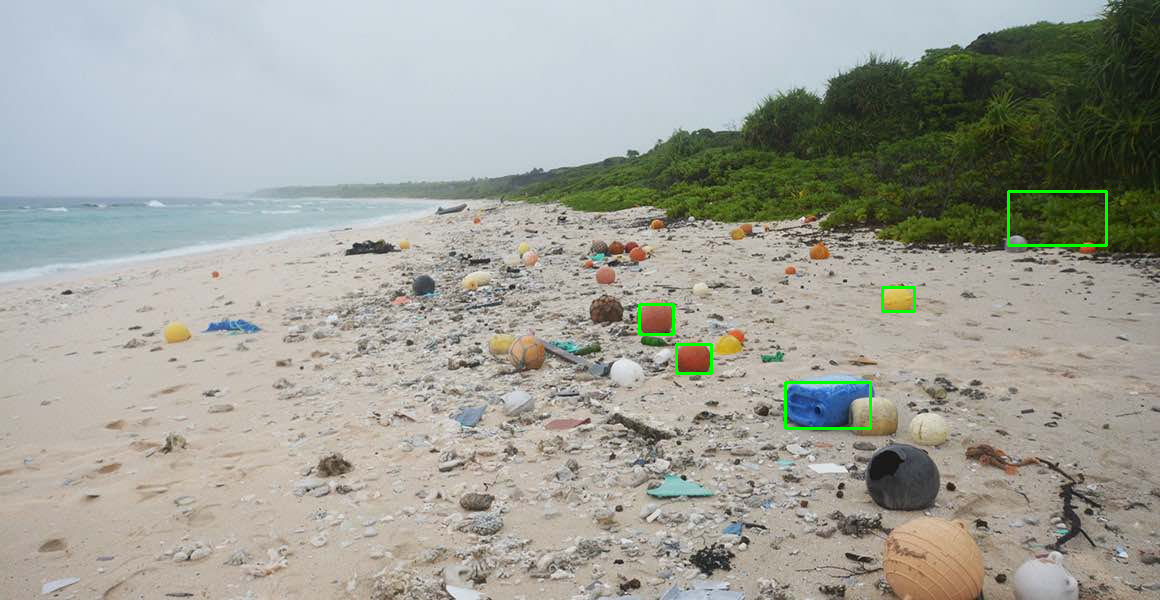

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

# Mount Google Drive
drive.mount("/content/drive")

# Read the original image
pp = "/content/drive/MyDrive/Colab Notebooks/sobelNshii/plastic.jpg"
image = cv2.imread(pp)

# Convert to HSV for easier color segmentation
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range of colors for different types of plastics in HSV
colors = {
    "red1": ((0, 120, 70), (10, 255, 255)),
    "red2": ((170, 120, 70), (180, 255, 255)),
    "blue": ((100, 150, 50), (140, 255, 255)),
    "yellow": ((20, 100, 100), (30, 255, 255)),
    "green": ((40, 40, 40), (80, 255, 255))
}

# Initialize parameters for filtering by area
min_area = 500  # Minimum area in pixels^2
max_area = 5000  # Maximum area in pixels^2

# Process each color
for color_name, (lower, upper) in colors.items():
    lower_bound = np.array(lower)
    upper_bound = np.array(upper)

    # Threshold the HSV image to get only colors within the range
    mask = cv2.inRange(hsv, lower_bound, upper_bound)

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on size and optionally shape
    for contour in contours:
        area = cv2.contourArea(contour)
        if min_area < area < max_area:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

